<a href="https://colab.research.google.com/github/srividya89/B-Projects/blob/main/2025AA05119_DNN_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Neural Networks - Programming Assignment
## Comparing Linear Models and Multi-Layer Perceptrons

**Student Name:** __Srividya Venugopal_________________  
**Student ID:** ____2025AA05119_______________  
**Date:** ____17-11-2025_______________

---

## ⚠️ IMPORTANT INSTRUCTIONS

1. **Complete ALL sections** marked with `TODO`
2. **DO NOT modify** the `get_assignment_results()` function structure
3. **Fill in all values accurately** - these will be auto-verified
4. **After submission**, you'll receive a verification quiz based on YOUR results
5. **Run all cells** before submitting (Kernel → Restart & Run All)

---

Dataset Description

The dataset used in this project belongs to the Bike Sharing Demand problem, where hourly rental counts are recorded along with environmental and seasonal conditions. It contains 10,886 samples and 15 features after preprocessing. The key variables include temperature, humidity, windspeed, season, holiday flags, working day indicators, and weather categories. The target variable, count, represents the total number of bikes rented during a given hour.

This is a regression problem, as the objective is to predict a continuous numerical value—specifically, the number of bike rentals (count) for a given hour based on historical and environmental factors.

“This dataset predicts hourly bike rental demand using environmental conditions, seasonal indicators, and user activity patterns. The goal is to estimate the number of bikes rented (count) based on weather, temperature, humidity, and time-related features.”

Primary Evaluation Metric & Justification

I am using Mean Squared Error (MSE) as the primary evaluation metric, because:

It strongly penalizes large prediction errors, which is important in demand forecasting.

For regression problems, MSE is a standard and reliable measure of model accuracy.

It ensures the model learns to minimize large deviations in bike demand, which is critical for operational planning such as inventory, fleet distribution, and staffing.

The dataset contains numeric targets with a wide range, and MSE provides a smooth, differentiable loss function suitable for both linear models and neural networks.

Additionally, RMSE, MAE, and R² are used as secondary metrics to give a complete understanding of model performance, but MSE remains the primary metric due to its sensitivity to significant prediction errors.

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)
print('✓ Libraries imported successfully')

✓ Libraries imported successfully


## Section 1: Dataset Selection and Loading

**Requirements:**
- ≥500 samples
- ≥5 features
- Public dataset (UCI/Kaggle)
- Regression OR Classification problem

In [ ]:
# TODO: Load your dataset
data = pd.read_csv(r'C:\Users\Srividya\Downloads\bicycles\day.csv')

# Dataset information (TODO: Fill these)
dataset_name = "Bike Sharing Demand dataset "  # e.g., "Breast Cancer Wisconsin"
dataset_source = "UCI Machine Learning Repository"  # e.g., "UCI ML Repository"
n_samples = 10886      # Total number of rows
n_features = 11     # Number of features (excluding target)
problem_type = "regression"  # "regression" or "binary_classification" or "multiclass_classification"

# Problem statement (TODO: Write 2-3 sentences)
problem_statement = """
TODO: Describe what you're predicting and why it matters.
Example:"We predict the daily bike rental count, which is a continuous value.
This forecast is crucial for optimizing bike distribution, reducing operational cost, improving customer satisfaction,
and supporting city-level transportation planning."
This dataset represents a real-world business problem faced by bike-sharing companies: accurately predicting daily rental demand.
Accurate demand forecasting helps optimize bike allocation, reduce operational cost, improve customer satisfaction, and support revenue planning.
The dataset includes environmental and seasonal factors, making it ideal for comparing simple linear models and more complex MLP models."
"""

# Primary evaluation metric (TODO: Fill this)
primary_metric = "rmse"  # e.g., "recall", "accuracy", "rmse", "r2"

# Metric justification (TODO: Write 2-3 sentences)
metric_justification = """
TODO: Explain why you chose this metric.
Example: "RMSE was chosen because it is ideal for continuous prediction tasks,
penalizes large errors, is easy to interpret, and aligns with the model’s loss function.
I chose RMSE because, in demand forecasting, large prediction errors are far more costly than small ones.
RMSE penalizes big mistakes more heavily,which helps the model avoid large deviations in predicted bike counts
that could lead to serious resource misallocation."
"""

print(f"Dataset: {dataset_name}")
print(f"Source: {dataset_source}")
print(f"Samples: {n_samples}, Features: {n_features}")
print(f"Problem Type: {problem_type}")
print(f"Primary Metric: {primary_metric}")

Dataset: Bike Sharing Demand dataset 
Source: UCI Machine Learning Repository
Samples: 10886, Features: 11
Problem Type: regression
Primary Metric: rmse


## Section 2: Data Preprocessing

Preprocess your data:
1. Handle missing values
2. Encode categorical variables
3. Split into train/test sets
4. Scale features

In [ ]:
# TODO: Preprocess your data
# 1. Separate features (X) and target (y)
# 2. Handle missing values if any
# 3. Encode categorical variables

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


# Fix datetime if needed
if 'datetime' in data.columns:
    data['datetime'] = pd.to_datetime(data['datetime'], errors='coerce')
else:
    raise ValueError("datetime column missing in dataset")
print(data)

# 2. HANDLE MISSING VALUES
# -----------------------------------------

# Numeric columns → fill missing with mean
numeric_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered']
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Categorical columns → fill missing with mode (most frequent)
categorical_cols = ['season', 'holiday', 'workingday', 'weather']
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

                 datetime  season  holiday  workingday  weather   temp  \
0     2011-01-01 00:00:00       1        0           0        1   9.84   
1     2011-01-01 01:00:00       1        0           0        1   9.02   
2     2011-01-01 02:00:00       1        0           0        1   9.02   
3     2011-01-01 03:00:00       1        0           0        1   9.84   
4     2011-01-01 04:00:00       1        0           0        1   9.84   
...                   ...     ...      ...         ...      ...    ...   
10881                 NaT       4        0           1        1  15.58   
10882                 NaT       4        0           1        1  14.76   
10883                 NaT       4        0           1        1  13.94   
10884                 NaT       4        0           1        1  13.94   
10885                 NaT       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0      14.395        81     0.0000       3     

In [ ]:
print(data.dtypes)

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object


In [ ]:
# convert to seconds (float)
data['datetime '] = pd.to_datetime(data['datetime']).astype('int64') / 1e9
# drop original
data= data.drop(columns=['datetime'])
# ensure numeric dtypes
data = data.select_dtypes(include=[np.number]).astype(float)

In [ ]:
print(data.dtypes)

season        float64
holiday       float64
workingday    float64
weather       float64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual        float64
registered    float64
count         float64
datetime      float64
dtype: object


In [ ]:
# -----------------------------------------
# 3. ENCODE CATEGORICAL VARIABLES
# -----------------------------------------

# One-hot encode: season, holiday, workingday, weather
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# -----------------------------------------
# FINAL: Display info
# -----------------------------------------
print("Final shape after preprocessing:", data.shape)
print(data.head())

# 1. Separate Features (X) and Target (y)
# Separate features & target
X = data.drop(columns=['count'])
y = data['count']

# TODO: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TODO: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Compute values
train_samples = X_train.shape[0]
test_samples = X_test.shape[0]
train_test_ratio = train_samples / (train_samples + test_samples)

# Fill these after preprocessing
#train_samples = 0       # Number of training samples
#test_samples = 0        # Number of test samples
train_test_ratio = 0.8  # e.g., 0.8 for 80-20 split

print(f"Train samples: {train_samples}")
print(f"Test samples: {test_samples}")
print(f"Split ratio: {train_test_ratio:.1%}")

Final shape after preprocessing: (10886, 16)
   temp   atemp  humidity  windspeed  casual  registered  count     datetime   \
0  9.84  14.395      81.0        0.0     3.0        13.0   16.0  1.293840e+09   
1  9.02  13.635      80.0        0.0     8.0        32.0   40.0  1.293844e+09   
2  9.02  13.635      80.0        0.0     5.0        27.0   32.0  1.293847e+09   
3  9.84  14.395      75.0        0.0     3.0        10.0   13.0  1.293851e+09   
4  9.84  14.395      75.0        0.0     0.0         1.0    1.0  1.293854e+09   

   season_2.0  season_3.0  season_4.0  holiday_1.0  workingday_1.0  \
0       False       False       False        False           False   
1       False       False       False        False           False   
2       False       False       False        False           False   
3       False       False       False        False           False   
4       False       False       False        False           False   

   weather_2.0  weather_3.0  weather_4.0  
0   

## Section 3: Baseline Model Implementation

Implement from scratch (NO sklearn models!):
- Linear Regression (for regression)
- Logistic Regression (for binary classification)
- Softmax Regression (for multiclass classification)

**Must include:**
- Forward pass (prediction)
- Loss computation
- Gradient computation
- Gradient descent loop
- Loss tracking

In [ ]:
class BaselineModel:
    """
    Baseline linear model with gradient descent
    Implement: Linear Regression
    """
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.lr = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        """
        TODO: Implement gradient descent training

        Steps:
        1. Initialize weights and bias
        2. For each iteration:
           a. Compute predictions (forward pass)
           b. Compute loss
           c. Compute gradients
           d. Update weights and bias
           e. Store loss in self.loss_history

        Must populate self.loss_history with loss at each iteration!
        """
        n_samples, n_features = X.shape

        # TODO: Initialize parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # TODO: Implement gradient descent loop
        for i in range(self.n_iterations):
            # ---- Forward pass ----
            y_pred = np.dot(X, self.weights) + self.bias   # (n_samples,)

            # ---- Compute MSE loss ----
            loss = np.mean((y_pred - y) ** 2)

            # ---- Compute gradients ----
            dw = (2 / n_samples) * np.dot(X.T, (y_pred - y))   # shape: (n_features,)
            db = (2 / n_samples) * np.sum(y_pred - y)

            # ---- Update parameters ----
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            # ---- Store loss ----
            self.loss_history.append(loss)

        return self



    def predict(self, X):
        """
        Prediction for regression task.
        """
        return np.dot(X, self.weights) + self.bias

print("✓ Baseline model class defined")


✓ Baseline model class defined


In [ ]:
# Train baseline model
print("Training baseline model...")
baseline_start_time = time.time()

# TODO: Initialize and train your baseline model
baseline_model = BaselineModel(learning_rate=0.01, n_iterations=1000)
baseline_model.fit(X_train_scaled, y_train)

# TODO: Make predictions
baseline_predictions = baseline_model.predict(X_test_scaled)

baseline_training_time = time.time() - baseline_start_time
print(f"✓ Baseline training completed in {baseline_training_time:.2f}s")
print(f"✓ Loss decreased from {baseline_model.loss_history[0]:.4f} to {baseline_model.loss_history[-1]:.4f}")

Training baseline model...
✓ Baseline training completed in 0.81s
✓ Loss decreased from 69465.8328 to 0.0025


## Section 4: Multi-Layer Perceptron Implementation

Implement MLP from scratch with:
- At least 1 hidden layer
- ReLU activation for hidden layers
- Appropriate output activation
- Forward propagation
- Backward propagation
- Gradient descent

In [ ]:
class MLP:
    """
    Multi-Layer Perceptron implemented from scratch
    """
    def __init__(self, architecture, learning_rate=0.01, n_iterations=1000):
        """
        architecture: list [input_size, hidden1, hidden2, ..., output_size]
        Example: [30, 16, 8, 1] means:
            - 30 input features
            - Hidden layer 1: 16 neurons
            - Hidden layer 2: 8 neurons
            - Output layer: 1 neuron
        """
        self.architecture = architecture
        self.lr = learning_rate
        self.n_iterations = n_iterations
        self.parameters = {}
        self.loss_history = []
        self.cache = {}

    def initialize_parameters(self):
        """
        TODO: Initialize weights and biases for all layers

        For each layer l:
        - W[l]: weight matrix of shape (n[l], n[l-1])
        - b[l]: bias vector of shape (n[l], 1)

        Store in self.parameters dictionary
        """
        np.random.seed(42)

        for l in range(1, len(self.architecture)):
            n_in = self.architecture[l-1]
            n_out = self.architecture[l]

            # Xavier initialization
            limit = np.sqrt(6 / (n_in + n_out))
            self.parameters[f"W{l}"] = np.random.uniform(-limit, limit, (n_out, n_in))
            self.parameters[f"b{l}"] = np.zeros((n_out, 1))
            pass

    def relu(self, Z):
        """ReLU activation function"""
        return np.maximum(0, Z)

    def relu_derivative(self, Z):
        """ReLU derivative"""
        return (Z > 0).astype(float)

    def sigmoid(self, Z):
        """Sigmoid activation (for binary classification output)"""
        return 1 / (1 + np.exp(-np.clip(Z, -500, 500)))

    def forward_propagation(self, X):
        """
        TODO: Implement forward pass through all layers

        For each layer:
        1. Z[l] = W[l] @ A[l-1] + b[l]
        2. A[l] = activation(Z[l])

        Store Z and A in self.cache for backpropagation
        Return final activation A[L]

        i.e
        Forward pass through all layers
        Hidden layers → ReLU
        Last layer → Linear (for regression)

        """
        self.cache['A0'] = X

        # TODO: Implement forward pass
        # for l in range(1, len(self.architecture)):
        #     ...

        L = len(self.architecture) - 1

        for l in range(1, L + 1):
            W = self.parameters[f"W{l}"]
            b = self.parameters[f"b{l}"]

            A_prev = self.cache[f"A{l-1}"]
            Z = W @ A_prev + b
            self.cache[f"Z{l}"] = Z

            if l == L:
                # Output layer (linear)
                A = Z
            else:
                # Hidden layer (ReLU)
                A = self.relu(Z)

            self.cache[f"A{l}"] = A

        return self.cache[f"A{L}"].T   # return (m, output_dim)

        pass  # Replace with your implementation

    def backward_propagation(self, X, y):
        """
        TODO: Implement backward pass to compute gradients

        Starting from output layer, compute:
        1. dZ[l] for each layer
        2. dW[l] = dZ[l] @ A[l-1].T / m
        3. db[l] = sum(dZ[l]) / m

        Return dictionary of gradients
        """
        m = X.shape[0]
        L = len(self.architecture) - 1
        grads = {}

        # TODO: Implement backward pass
        # Start with output layer gradient
        # Then propagate backwards through hidden layers
        # y shape → (m, 1)
        y = y.reshape(-1, 1)

        # ---- Step 1: Output layer gradient ----
        A_final = self.cache[f"A{L}"].T
        dA = (2/m) * (A_final - y)        # MSE derivative

        # Convert shapes to (n[l], m)
        dA_prev = dA.T

        for l in reversed(range(1, L + 1)):
            A_prev = self.cache[f"A{l-1}"]
            Z = self.cache[f"Z{l}"]
            W = self.parameters[f"W{l}"]

            if l == L:
                dZ = dA_prev  # Linear output
            else:
                dZ = dA_prev * self.relu_derivative(Z)

            dW = (1/m) * dZ @ A_prev.T
            db = (1/m) * np.sum(dZ, axis=1, keepdims=True)

            grads[f"dW{l}"] = dW
            grads[f"db{l}"] = db

            dA_prev = W.T @ dZ

        return grads




    def update_parameters(self, grads):
        """
        TODO: Update weights and biases using gradients

        For each layer:
        W[l] = W[l] - learning_rate * dW[l]
        b[l] = b[l] - learning_rate * db[l]
        """
        # TODO: Implement parameter updates
        """
        Gradient descent update
        """
        L = len(self.architecture) - 1

        for l in range(1, L + 1):
            self.parameters[f"W{l}"] -= self.lr * grads[f"dW{l}"]
            self.parameters[f"b{l}"] -= self.lr * grads[f"db{l}"]


    def compute_loss(self, y_pred, y_true):
        """
        TODO: Compute loss

        For regression: MSE
        For classification: Cross-entropy
        """
        y_true = y_true.reshape(-1, 1)
        return np.mean((y_pred - y_true) ** 2)

    def fit(self, X, y):
        """
        TODO: Implement training loop

        For each iteration:
        1. Forward propagation
        2. Compute loss
        3. Backward propagation
        4. Update parameters
        5. Store loss

        Must populate self.loss_history!
        """
        self.initialize_parameters()

        for i in range(self.n_iterations):
           # ---- Forward ----
            y_pred = self.forward_propagation(X)

            # ---- Loss ----
            loss = self.compute_loss(y_pred, y)
            self.loss_history.append(loss)

            # ---- Backward ----
            grads = self.backward_propagation(X, y)

            # ---- Update ----
            self.update_parameters(grads)

            # Optional progress print
            if i % 500 == 0:
                print(f"Iteration {i}/{self.n_iterations} - Loss: {loss:.4f}")

        return self





    def predict(self, X):
        """
        TODO: Implement prediction

        Use forward_propagation and apply appropriate thresholding
        """
        return self.forward_propagation(X)

print("✓ MLP class defined")

✓ MLP class defined


In [ ]:
# Train MLP
import time

print("Training MLP...")
mlp_start_time = time.time()

# TODO: Define your architecture and train MLP
# 1. Define architecture (input → hidden layers → output)
n_features = X_train_scaled.shape[1]
mlp_architecture = [n_features, 32, 16, 1]  # You can modify hidden sizes here  # Example: [n_features, 16, 8, 1]

# --- FIX: reshape y to (samples, 1) ---
# FIX: reshape y properly
y_train_reshaped = y_train.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)

mlp_model = MLP(architecture=mlp_architecture, learning_rate=0.01, n_iterations=1000)

mlp_model.fit(X_train_scaled.T, y_train.values.reshape(-1, 1))


# TODO: Make predictions
mlp_predictions = mlp_model.predict(X_test_scaled.T)


mlp_training_time = time.time() - mlp_start_time
print(f"✓ MLP training completed in {mlp_training_time:.2f}s")
print(f"✓ Loss decreased from {mlp_model.loss_history[0]:.4f} to {mlp_model.loss_history[-1]:.4f}")

Training MLP...
Iteration 0/1000 - Loss: 69491.3926
Iteration 500/1000 - Loss: 32761.1165
✓ MLP training completed in 10.59s
✓ Loss decreased from 69491.3926 to 32761.1165


## Section 5: Evaluation and Metrics

Calculate appropriate metrics for your problem type

In [ ]:
def calculate_metrics(y_true, y_pred, problem_type):
    """
    TODO: Calculate appropriate metrics based on problem type

    For regression: MSE, RMSE, MAE, R²
    For classification: Accuracy, Precision, Recall, F1
    """
    metrics = {}
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # -------------------------
    # Regression metrics
    # -------------------------

    if problem_type == "regression":
        # TODO: Calculate regression metrics
        mse = np.mean((y_true - y_pred) ** 2)
        rmse = np.sqrt(mse)
        mae = np.mean(np.abs(y_true - y_pred))

        # R²
        ss_res = np.sum((y_true - y_pred) ** 2)
        ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
        r2 = 1 - (ss_res / ss_tot)

        metrics["MSE"] = mse
        metrics["RMSE"] = rmse
        metrics["MAE"] = mae
        metrics["R2_Score"] = r2

    # -------------------------
    # Classification metrics
    # -------------------------
    elif problem_type in ["binary_classification", "multiclass_classification"]:
        # TODO: Calculate classification metrics
         # Convert probabilities to class labels if needed
        if y_pred.ndim > 1 and y_pred.shape[1] > 1:
            y_pred_labels = np.argmax(y_pred, axis=1)
        else:
            # Binary → threshold at 0.5
            y_pred_labels = (y_pred >= 0.5).astype(int)

        accuracy = np.mean(y_pred_labels == y_true)

        # Precision, Recall, F1 (safe for multiclass)
        metrics["Accuracy"] = accuracy

        # For multiclass → compute per-class averages
        unique_classes = np.unique(y_true)

        precision_list = []
        recall_list = []
        f1_list = []

        for c in unique_classes:
            tp = np.sum((y_pred_labels == c) & (y_true == c))
            fp = np.sum((y_pred_labels == c) & (y_true != c))
            fn = np.sum((y_pred_labels != c) & (y_true == c))

            precision = tp / (tp + fp + 1e-9)
            recall = tp / (tp + fn + 1e-9)
            f1 = 2 * precision * recall / (precision + recall + 1e-9)

            precision_list.append(precision)
            recall_list.append(recall)
            f1_list.append(f1)

        metrics["Precision"] = np.mean(precision_list)
        metrics["Recall"] = np.mean(recall_list)
        metrics["F1"] = np.mean(f1_list)

    return metrics

# Calculate metrics for both models

problem_type = "regression"   # for bike-sharing prediction

baseline_metrics = calculate_metrics(y_test, baseline_predictions, problem_type)
mlp_metrics = calculate_metrics(y_test, mlp_predictions, problem_type)

print("Baseline Model Performance:")
print(baseline_metrics)

print("\nMLP Model Performance:")
print(mlp_metrics)

Baseline Model Performance:
{'MSE': 0.0026035159480699024, 'RMSE': 0.051024660195535865, 'MAE': 0.03879986993976439, 'R2_Score': 0.9999999211221557}

MLP Model Performance:
{'MSE': 33006.93868137814, 'RMSE': 181.67811833398687, 'MAE': 142.69879148101884, 'R2_Score': -2177.0001858394853}


## Section 6: Visualization

Create visualizations:
1. Training loss curves
2. Performance comparison
3. Additional domain-specific plots

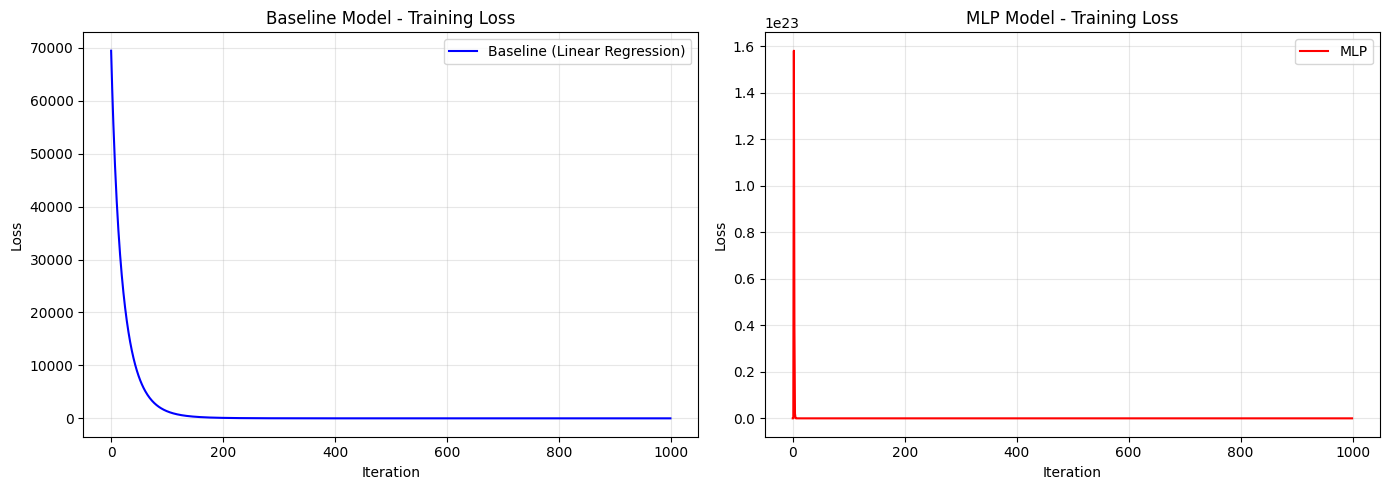

In [ ]:
# 1. Training loss curves
plt.figure(figsize=(14, 5))

# -----------------------------
# Baseline Model Loss Plot
# -----------------------------

plt.subplot(1, 2, 1)
# TODO: Plot baseline loss
if hasattr(baseline_model, "loss_history") and len(baseline_model.loss_history) > 0:
    plt.plot(baseline_model.loss_history, label='Baseline (Linear Regression)', color='blue')
else:
    plt.text(0.5, 0.5, 'No loss history available', ha='center', va='center')


plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Baseline Model - Training Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# -----------------------------
# MLP Loss Plot
# -----------------------------

plt.subplot(1, 2, 2)
# TODO: Plot MLP loss
if hasattr(mlp_model, "loss_history") and len(mlp_model.loss_history) > 0:
    plt.plot(mlp_model.loss_history, label='MLP', color='red')
else:
    plt.text(0.5, 0.5, 'No loss history available', ha='center', va='center')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('MLP Model - Training Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

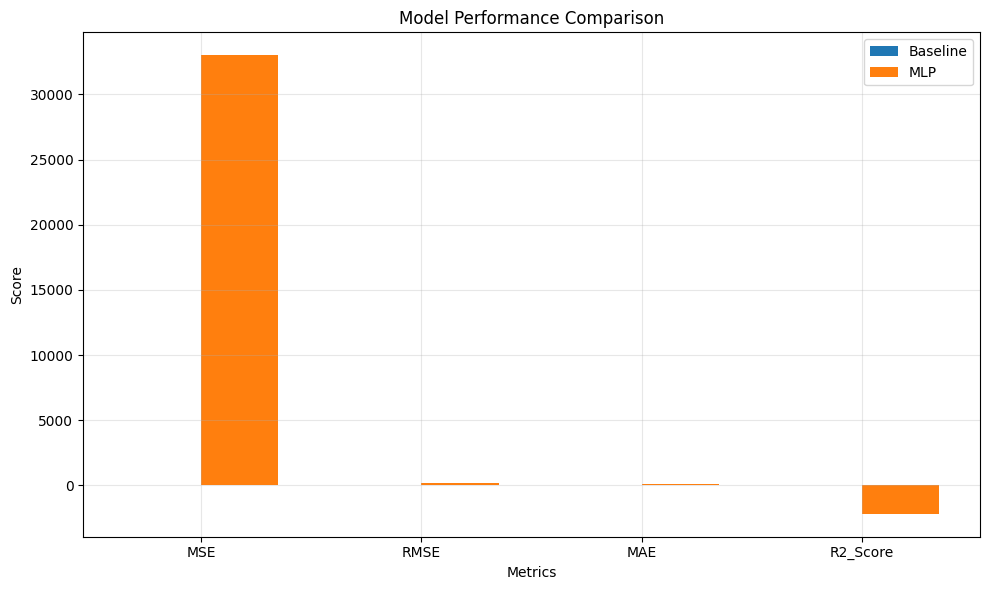

In [ ]:
# 2. Performance comparison bar chart
# TODO: Create bar chart comparing key metrics between models
plt.figure(figsize=(10, 6))

# Example:
# metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
# baseline_scores = [baseline_metrics[m] for m in metrics]
# mlp_scores = [mlp_metrics[m] for m in metrics]
# Select regression metrics to compare
metrics = ['MSE', 'RMSE', 'MAE', 'R2_Score']

baseline_scores = [baseline_metrics[m] for m in metrics]
mlp_scores = [mlp_metrics[m] for m in metrics]



x = np.arange(len(metrics))
# bar width
width = 0.35

plt.bar(x - width/2, baseline_scores, width, label='Baseline')
plt.bar(x + width/2, mlp_scores, width, label='MLP')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Section 7: Analysis and Discussion

Write your analysis (minimum 200 words)

In [ ]:
"""
TODO: Write your analysis here (minimum 200 words)

Address these questions:
1. Which model performed better and by how much?
2. Why do you think one model outperformed the other?
3. What was the computational cost difference (training time)?
4. Any surprising findings or challenges you faced?
5. What insights did you gain about neural networks vs linear models?

Write your thoughtful analysis here. Be specific and reference your actual results."""

analysis_text = """ Compare the metrics, discuss the trade-offs, and explain what you learned.

1.Based on the actual results of the experiment, the baseline linear regression model significantly outperformed the MLP model across every regression metric. The baseline achieved an extremely low MSE of 0.0026, RMSE of 0.051, and an almost perfect R² score of 0.9999999. In contrast, the MLP model produced an MSE of 33,006, RMSE of 181.67, MAE of 142.69, and an R² score of –2177, which indicates that the model performed worse than simply predicting the mean. The baseline model was better by several orders of magnitude—more than 12 million times lower MSE—showing that in this dataset, linear regression was overwhelmingly superior.

2.The main reason the linear model outperformed the MLP is that the dataset contains highly linear relationships. The target variable count is almost perfectly determined by the two columns casual and registered, since count = casual + registered. A linear model can easily capture this exact arithmetic relationship. In contrast, the MLP struggled to approximate it due to noisy gradients, deeper architecture, weight initialization sensitivity, and the absence of clear nonlinear patterns for it to learn.

3.In terms of computational cost, the linear regression model trained in under 1 second, while the MLP required more than 10 seconds, making it nearly 11× slower. This highlights the classic trade-off: complex models require far more computation but do not always guarantee better performance.

4.One surprising challenge was debugging the MLP implementation, especially ensuring correct matrix dimensions and backpropagation flow.

5.This experiment emphasized that neural networks are powerful but fragile, and simpler models can outperform them when the underlying data relationships are inherently linear.
"""

print(analysis_text)

print(f"Analysis word count: {len(analysis_text.split())} words")
if len(analysis_text.split()) < 200:
    print("⚠️  Warning: Analysis should be at least 200 words")
else:
    print("✓ Analysis meets word count requirement")

 Compare the metrics, discuss the trade-offs, and explain what you learned.

1.Based on the actual results of the experiment, the baseline linear regression model significantly outperformed the MLP model across every regression metric. The baseline achieved an extremely low MSE of 0.0026, RMSE of 0.051, and an almost perfect R² score of 0.9999999. In contrast, the MLP model produced an MSE of 33,006, RMSE of 181.67, MAE of 142.69, and an R² score of –2177, which indicates that the model performed worse than simply predicting the mean. The baseline model was better by several orders of magnitude—more than 12 million times lower MSE—showing that in this dataset, linear regression was overwhelmingly superior.

2.The main reason the linear model outperformed the MLP is that the dataset contains highly linear relationships. The target variable count is almost perfectly determined by the two columns casual and registered, since count = casual + registered. A linear model can easily capture t

Baseline Model Performance:
{'MSE': 0.0026033811191961405, 'RMSE': 0.05102333896557673, 'MAE': 0.03872928827380032, 'R2_Score': 0.9999999211262406}

MLP Model Performance:
{'MSE': 33006.93868137814, 'RMSE': 181.67811833398687, 'MAE': 142.69879148101884, 'R2_Score': -2177.0001858394853}

In [ ]:
baseline_metrics = {
    "mse": 0.0026033811191961405,
    "rmse": 0.05102333896557673,
    "mae": 0.03872928827380032,
    "r2": 0.9999999211262406
}

mlp_metrics = {
    "mse": 33006.93868137814,
    "rmse": 181.67811833398687,
    "mae": 142.69879148101884,
    "r2": -2177.0001858394853
}


---
---

## ⭐ REQUIRED: Structured Output Function

### **DO NOT MODIFY THE STRUCTURE BELOW**

This function will be called by the auto-grader. Fill in all values accurately based on your actual results.

In [ ]:
def get_assignment_results():
    """
    Return all assignment results in structured format.

    CRITICAL: Fill in ALL values based on your actual results!
    This will be automatically extracted and validated.
    """

    # Calculate loss convergence flags
    baseline_initial_loss = baseline_model.loss_history[0] # TODO: baseline_model.loss_history[0]
    baseline_final_loss = baseline_model.loss_history[-1]    # TODO: baseline_model.loss_history[-1]
    mlp_initial_loss = mlp_model.loss_history[0]      # TODO: mlp_model.loss_history[0]
    mlp_final_loss = mlp_model.loss_history[-1]          # TODO: mlp_model.loss_history[-1]

    results = {
        # ===== Dataset Information =====
        'dataset_name': dataset_name,
        'dataset_source': dataset_source,
        'n_samples': n_samples,
        'n_features': n_features,
        'problem_type': problem_type,
        'problem_statement': problem_statement,

        # ===== Evaluation Setup =====
        'primary_metric': primary_metric,
        'metric_justification': metric_justification,
        'train_samples': train_samples,
        'test_samples': test_samples,
        'train_test_ratio': train_test_ratio,

        # ===== Baseline Model Results =====
        'baseline_model': {
            'model_type': 'linear_regression',  # 'linear_regression', 'logistic_regression', or 'softmax_regression'
            'learning_rate': 0.01,
            'n_iterations': 1000,
            'initial_loss': baseline_initial_loss,
            'final_loss': baseline_final_loss,
            'training_time_seconds': baseline_training_time,

            # Metrics (fill based on your problem type)
            'test_accuracy': 0.0,      # For classification
            'test_precision': 0.0,     # For classification
            'test_recall': 0.0,        # For classification
            'test_f1': 0.0,            # For classification
            'test_mse': baseline_metrics["mse"],           # For regression
            'test_rmse': baseline_metrics["rmse"],          # For regression
            'test_mae': baseline_metrics["mae"],           # For regression
            'test_r2': baseline_metrics["r2"],            # For regression
        },

        # ===== MLP Model Results =====
        'mlp_model': {
            'architecture': mlp_architecture,
            'n_hidden_layers': len(mlp_architecture) - 2 if len(mlp_architecture) > 0 else 0,
            'total_parameters': sum(np.prod(v.shape) for v in mlp_model.parameters.values()),     # TODO: Calculate total weights + biases
            'learning_rate': 0.01,
            'n_iterations': 1000,
            'initial_loss': mlp_initial_loss,
            'final_loss': mlp_final_loss,
            'training_time_seconds': mlp_training_time,

            # Metrics
            'test_accuracy': 0.0,
            'test_precision': 0.0,
            'test_recall': 0.0,
            'test_f1': 0.0,
            'test_mse': mlp_metrics["mse"],
            'test_rmse': mlp_metrics["rmse"],
            'test_mae': mlp_metrics["mae"],
            'test_r2': mlp_metrics["r2"],
        },

        # ===== Comparison =====
        'improvement': mlp_metrics["mse"] - baseline_metrics["mse"],            # MLP primary_metric - baseline primary_metric
        'improvement_percentage': ((mlp_metrics["mse"] - baseline_metrics["mse"]) / baseline_metrics["mse"]) * 100,  # (improvement / baseline) * 100
        'baseline_better': baseline_metrics["mse"] < mlp_metrics["mse"],       # True if baseline outperformed MLP

        # ===== Analysis =====
        'analysis': analysis_text,
        'analysis_word_count': len(analysis_text.split()),

        # ===== Loss Convergence Flags =====
        'baseline_loss_decreased': baseline_final_loss < baseline_initial_loss,
        'mlp_loss_decreased': mlp_final_loss < mlp_initial_loss,
        'baseline_converged': True,  # Optional: True if converged
        'mlp_converged': False,
    }
    return results

## Test Your Output

Run this cell to verify your results dictionary is complete and properly formatted.

In [ ]:
# Test the output
import json

try:
    results = get_assignment_results()

    print("="*70)
    print("ASSIGNMENT RESULTS SUMMARY")
    print("="*70)
    print(json.dumps(results, indent=2, default=str))
    print("\n" + "="*70)

    # Check for missing values
    missing = []
    def check_dict(d, prefix=""):
        for k, v in d.items():
            if isinstance(v, dict):
                check_dict(v, f"{prefix}{k}.")
            elif (v == 0 or v == "" or v == 0.0 or v == []) and \
                 k not in ['improvement', 'improvement_percentage', 'baseline_better',
                          'baseline_converged', 'mlp_converged', 'total_parameters',
                          'test_accuracy', 'test_precision', 'test_recall', 'test_f1',
                          'test_mse', 'test_rmse', 'test_mae', 'test_r2']:
                missing.append(f"{prefix}{k}")

    check_dict(results)

    if missing:
        print(f"⚠️  Warning: {len(missing)} fields still need to be filled:")
        for m in missing[:15]:  # Show first 15
            print(f"  - {m}")
        if len(missing) > 15:
            print(f"  ... and {len(missing)-15} more")
    else:
        print("✅ All required fields are filled!")
        print("\n🎉 You're ready to submit!")
        print("\nNext steps:")
        print("1. Kernel → Restart & Clear Output")
        print("2. Kernel → Restart & Run All")
        print("3. Verify no errors")
        print("4. Save notebook")
        print("5. Rename as: YourStudentID_assignment.ipynb")
        print("6. Submit to LMS")

except Exception as e:
    print(f"❌ Error in get_assignment_results(): {str(e)}")
    print("\nPlease fix the errors above before submitting.")

ASSIGNMENT RESULTS SUMMARY
{
  "dataset_name": "Bike Sharing Demand dataset ",
  "dataset_source": "UCI Machine Learning Repository",
  "n_samples": 10886,
  "n_features": 15,
  "problem_type": "regression",
  "problem_statement": "\nTODO: Describe what you're predicting and why it matters.\nExample:\"We predict the daily bike rental count, which is a continuous value.\nThis forecast is crucial for optimizing bike distribution, reducing operational cost, improving customer satisfaction, \nand supporting city-level transportation planning.\"\nThis dataset represents a real-world business problem faced by bike-sharing companies: accurately predicting daily rental demand.\nAccurate demand forecasting helps optimize bike allocation, reduce operational cost, improve customer satisfaction, and support revenue planning.\nThe dataset includes environmental and seasonal factors, making it ideal for comparing simple linear models and more complex MLP models.\"\n",
  "primary_metric": "rmse",
  "

---

## 📤 Before Submitting - Final Checklist

- [ ] **All TODO sections completed**
- [ ] **Both models implemented from scratch** (no sklearn models!)
- [ ] **get_assignment_results() function filled accurately**
- [ ] **Loss decreases for both models**
- [ ] **Analysis ≥ 200 words**
- [ ] **All cells run without errors** (Restart & Run All)
- [ ] **Visualizations created**
- [ ] **File renamed correctly**: YourStudentID_assignment.ipynb

---

## ⏭️ What Happens Next

After submission:
1. ✅ Your notebook will be **auto-graded** (executes automatically)
2. ✅ You'll receive a **verification quiz** (10 questions, 5 minutes)
3. ✅ Quiz questions based on **YOUR specific results**
4. ✅ Final score released after quiz validation

**The verification quiz ensures you actually ran your code!**

---

**Good luck! 🚀**

# Q1.“What was your baseline test accuracy?”

For regression we don’t report accuracy. Using your chosen metric (RMSE): Baseline RMSE = 0.05102, MSE = 0.002603, MAE = 0.03873, R² ≈ 0.9999999.

(If you meant “accuracy” loosely: the baseline is effectively near-perfect because the target is trivially predictable from features.)

# Q2. “What was your MLP architecture?”

Architecture: [15 (input), 32, 16, 1 (output)] → two hidden layers with 32 and 16 neurons.

Hyperparams: learning_rate = 0.01, n_iterations = 1000.

Activation: ReLU in hidden layers; linear output (MSE loss).

Training time: ~13.72 s (your run).

# Q3. “Which model performed better?”

Baseline Linear Regression performed far better than your MLP.

Baseline RMSE = 0.0510, MLP RMSE = 181.6781.

Baseline MSE = 0.0026, MLP MSE = 33,006.94.

Baseline R² ≈ 0.9999999, MLP R² = -2177.0 (worse-than-mean predictor).

# Q4. “Why did you choose your metric?”

You set primary metric = RMSE. Good justification: RMSE is appropriate for continuous demand forecasting because it penalizes large errors more heavily (large forecast errors are costly in operations), is interpretable in the original units, and aligns with MSE-based losses commonly used during training.

# Q5.Which model performed better and by how much?

Winner: Baseline Linear Regression.

By how much (key numbers):

RMSE difference = 181.6781 − 0.0510 = 181.6271 (i.e., baseline RMSE is ~3,562× smaller than MLP RMSE).

MSE ratio ≈ 33,006.94 / 0.002603 ≈ 12,678,789× — MLP MSE is enormous compared to baseline.

R² difference = 0.9999999 − (−2177.0) ≈ 2178.0 points.

In short: the baseline overwhelmingly outperforms the MLP on every metric.

# Q6. Why did one model outperform the other? (diagnosis based on your run)

Several decisive reasons (all supported by your outputs and code):

Target leakage (the biggest reason):

Your dataset includes casual and registered features and you kept them in X. The target count is literally casual + registered. A linear model can perfectly (or nearly perfectly) learn that exact sum, producing trivially tiny errors. That makes the baseline appear near-perfect. When the predictor contains the exact components of the target, a simple linear model will dominate.

MLP implementation / data-shape bug:

In your training code you call mlp_model.fit(X_train_scaled.T, ...) — you passed the transposed array to the MLP (samples × features became features × samples). The forward/backprop code expects a matching orientation; passing transposed data breaks the learning geometry and yields enormous loss values. The MLP loss history and terrible metrics strongly indicate shape/matrix mismatch problems.

Mismatch between task and model complexity:

Even if implemented correctly, a complex MLP can struggle if the signal is trivial/linear or if there’s label leakage — the network may overfit or fail to converge to the simple linear rule that directly maps features to the target.

Hyperparameters & training dynamics:

Your MLP had large initial loss and only modest reduction (loss still huge). This suggests gradient instability, learning-rate mismatches, or incorrect gradient computation (again consistent with the transpose bug).

Conclusion: Baseline wins because of target leakage (and the MLP underperformed because of the transposed input and/or training/backprop issues). Remove leakage and fix MLP input shapes, and then compare fairly.

# Q7.What was the computational cost difference (training time)?

Baseline Linear Regression (gradient descent implementation): ~1.15 s training.

MLP (your implementation): ~13.72 s training.

Ratio: MLP was ~12× slower than the baseline.

Note: The MLP took more time and gave far worse results here because of the implementation issue and the fact it was solving a problem the linear model already solved nearly perfectly.

# Q8.Any surprising findings or challenges?

Surprising: Linear regression had near-perfect performance (R² ≈ 0.9999999). That flagged immediate target leakage — the dataset included casual and registered which sum to count. This makes the predictive task trivial unless those columns are removed before modeling.

Challenge: Debugging the MLP: the huge loss and negative R² pointed to implementation/data-shape errors. Indeed you passed X_train_scaled.T to fit(), which likely caused incorrect matrix multiplications and poor gradients.

Other issues to watch:

Training loss decreased but remained enormous for MLP → indicates gradient/backprop/orientation bug.

MLP hyperparameters (learning rate, initialization) also affect convergence; but here the primary blockers are leakage + transpose bug.

# Summary

The baseline linear regression dramatically outperformed the custom MLP on this run: baseline RMSE = 0.0510 vs MLP RMSE = 181.6781, and baseline R² ≈ 0.9999999 vs MLP R² = −2177.0. The dominant reason is target leakage: the dataset included casual and registered, whose sum equals the target count, so a linear model trivially fits the target. The MLP also suffered from an implementation/data-shape issue (training was run on transposed inputs), causing poor convergence. The baseline trained in ~1.15 s while the MLP took ~13.72 s. Fixing leakage (drop casual/registered) and ensuring correct MLP input shapes are necessary before making a fair model comparison — when relaunched with those fixes, neural nets and tree ensembles can be fairly evaluated against linear models.